In [1]:
!pip install gensim
!pip install pyldavis
!pip install wordcloud
!pip install textblob
!pip install textstat
!pip install nltk

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136870 sha256=05461e26c8fe363a5a28f4163cfbe1c7bbb584b7b24449f14fe362f68383c524
  Stored in directory: c:\users\megha\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
Successfully built pyldavis
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Megha\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Megha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Megha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Megha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Megha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Megha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-

True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk, time
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
import collections, itertools

In [3]:
# Function to tokenize the tweets
def custom_tokenize(text):
    """Function that tokenizes text"""
    from nltk.tokenize import word_tokenize
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return word_tokenize(text)

In [4]:
def clean_up(data):
    """Function that cleans up the data into a shape that can be further used for modeling"""
    english = data[data['lang']=='en'] # extract only tweets in english language
    english.drop_duplicates() # drop duplicate tweets
    english['text'].dropna(inplace=True) # drop any rows with missing tweets
    tokenized = english['text'].apply(custom_tokenize) # Tokenize tweets
    lower_tokens = tokenized.apply(lambda x: [t.lower() for t in x]) # Convert tokens into lower case
    alpha_only = lower_tokens.apply(lambda x: [t for t in x if t.isalpha()]) # Remove punctuations
    no_stops = alpha_only.apply(lambda x: [t for t in x if t not in stopwords.words('english')]) # remove stop words
    no_stops.apply(lambda x: [x.remove(t) for t in x if t=='rt']) # remove acronym "rt"
    no_stops.apply(lambda x: [x.remove(t) for t in x if t=='https']) # remove acronym "https"
    no_stops.apply(lambda x: [x.remove(t) for t in x if t=='twitter']) # remove the word "twitter"
    no_stops.apply(lambda x: [x.remove(t) for t in x if t=='retweet']) # remove the word "retweet"
    return no_stops

In [5]:
start = time.time()
warnings.filterwarnings("ignore")
use_cols = ['text', 'lang']
path = 'C:\\Users\\Megha\\Learnings\\COVID Analysis\\all_tweets.csv'
data_iterator = pd.read_csv(path, usecols=use_cols, chunksize=50000)
chunk_list = []
for data_chunk in data_iterator:
    filtered_chunk = clean_up(data_chunk)
    chunk_list.append(filtered_chunk)
tidy_data = pd.concat(chunk_list)
end = time.time()
total=end-start
total

3068.2846076488495

In [6]:
print(data_chunk)

                                                     text lang
350000  RT @katjaberlin: dafür, dass die regierung cor...   de
350001  RT @pedroferriz3: Ándale no creo q sea una bue...   es
350002  RT @docbrandon12: @gracemercylove2 @PamLongCO ...   en
350003  RT @SenadorRogerio: Pesquisa DataSenado revela...   pt
350004  RT @escribinista: Los que todavía no tuvimos c...   es
...                                                   ...  ...
399982                             Una vez más 👇🏼👇🏼👇🏼👇🏼👇🏼   es
399983  RT @mateotraglia: Que cepa del covid sos según...   es
399984  RT @haleemak_: Should we not be talking about ...   en
399985  RT @georgrestle: Bruderschaften und Bürgerwehr...   de
399986  ICYMI: “When policy experts define what makes ...   en

[49987 rows x 2 columns]


In [7]:
tidy_data.shape

(175065,)

In [8]:
tidy_data.head()

0    [kiritsomaiya, beds, covid, hospitals, rendesi...
2    [breach, contract, probably, written, repercus...
3    [got, news, people, society, died, due, covid,...
4    [need, proper, inquiry, obscene, tory, governm...
5    [doubling, rate, delhi, eased, days, cmodelhi,...
Name: text, dtype: object

In [9]:
path = 'C:\\Users\\Megha\\Learnings\\COVID Analysis\\tidy_tweets.json'
tidy_data.to_json(path, orient='table')

In [10]:
# Import the tweets from the json file into a pandas dataframe
start=time.time()

path = 'C:\\Users\\Megha\\Learnings\\COVID Analysis\\tidy_tweets.json'
tidy_tweets = pd.read_json(path, orient='table')
tweets = tidy_tweets['text']

end=time.time()
total=end-start
total

1.844130039215088

In [15]:
len(tweets)

175065

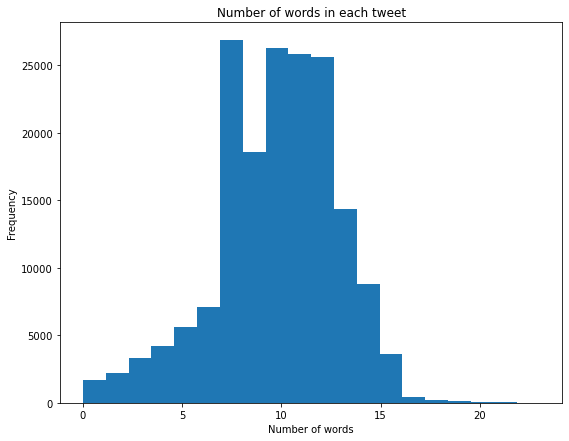

In [19]:
# Number of words in each tweet
_ = tweets.str.len().hist(grid=False, figsize=(9,7), bins=20)
_ = plt.xlabel('Number of words')
_ = plt.ylabel('Frequency')
_ = plt.title('Number of words in each tweet')
plt.show()

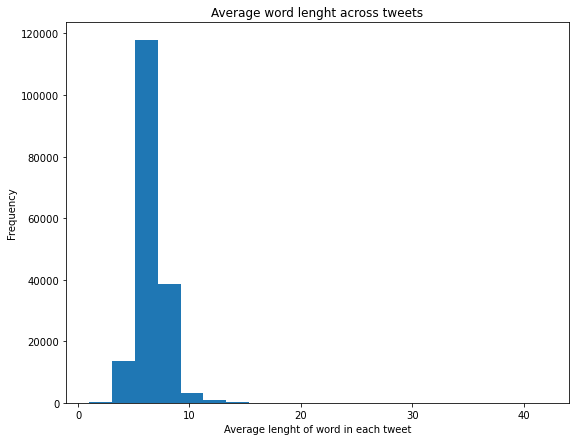

In [12]:
# let's check the average word lenght in each tweet
_ = tweets.apply(lambda x: [len(word) for word in x]).apply(lambda y: np.mean(y)).hist(grid=False, bins=20, figsize=(9,7))
_ = plt.xlabel('Average lenght of word in each tweet')
_ = plt.ylabel('Frequency')
_ = plt.title('Average word lenght across tweets')
plt.show()

In [20]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary
# Create a Dictionary from the tweets
start = time.time()

dictionary = Dictionary(tweets)

end = time.time()

total = end-start
total

3.8177847862243652

In [25]:
# Create corpus for bag of words (token IDs of each word with their frequencies)
start = time.time()

corpus = tweets.apply(lambda x: dictionary.doc2bow(x))

end = time.time()
total = end-start
total

2.244994878768921

In [26]:
corpus

0         [(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1...
2         [(13, 1), (14, 1), (15, 2), (16, 1), (17, 1), ...
3         [(1, 1), (21, 1), (22, 1), (23, 1), (24, 1), (...
4         [(33, 1), (34, 1), (35, 1), (36, 1), (37, 1), ...
5         [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1), ...
                                ...                        
399978    [(28, 1), (76, 1), (107, 1), (376, 1), (646, 1...
399979    [(7, 1), (54, 1), (235, 1), (1207, 1), (1386, ...
399981    [(1, 1), (23, 1), (97, 1), (183, 1), (797, 1),...
399984                                          [(3640, 1)]
399986    [(85, 1), (153, 1), (173, 1), (187, 1), (408, ...
Name: text, Length: 175065, dtype: object

In [27]:
import collections, itertools
start = time.time()

total_word_count = collections.defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id]+=word_count
    
end = time.time()
total = end-start
total

0.4667811393737793

In [28]:
start = time.time()

sorted_bow = sorted(total_word_count.items(), key=lambda kv :kv[1], reverse=True)
words = []
word_counts = []
for word_id, word_count in sorted_bow[:20]:
    words.append(dictionary.get(word_id)) 
    word_counts.append(word_count)
    
end = time.time()
total = end-start
total

0.016954660415649414

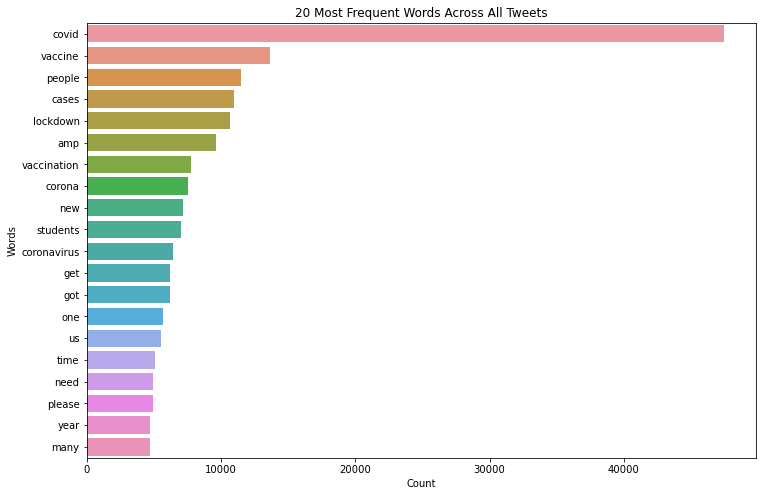

In [29]:
fig = plt.figure(figsize=(12,8))
fig = sns.barplot(x=word_counts, y=words)
fig = plt.xlabel("Count")
fig = plt.ylabel('Words')
fig = plt.title('20 Most Frequent Words Across All Tweets')
plt.show()

In [30]:
from nltk.util import ngrams
start = time.time()

bigrams = tweets.apply(lambda x: ngrams(x,2))

end = time.time()
total = end-start
total

1.6670408248901367

In [31]:
bi_grams = bigrams.apply(lambda x: list(x))

In [32]:
top_20_bigrams = Counter(itertools.chain.from_iterable(bi_grams)).most_common(20)

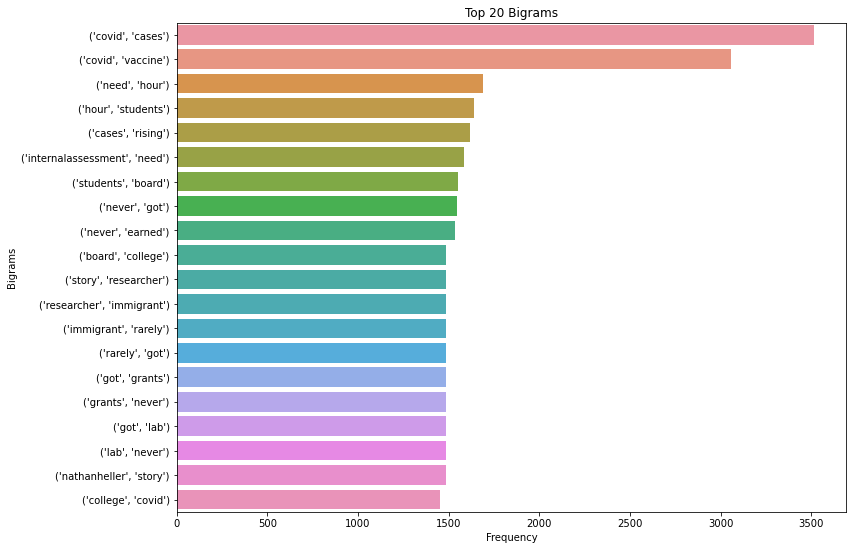

In [33]:
top_bigram = pd.DataFrame(top_20_bigrams, columns=['bigram', 'frequency'])
top_bigram.set_index('bigram', inplace=True)
_ = plt.figure(figsize=(12,9))
_ = sns.barplot(x=top_bigram.frequency, y=top_bigram.index, orient='h')
_ = plt.xlabel('Frequency')
_ = plt.ylabel('Bigrams')
_ = plt.title('Top 20 Bigrams')
plt.show()

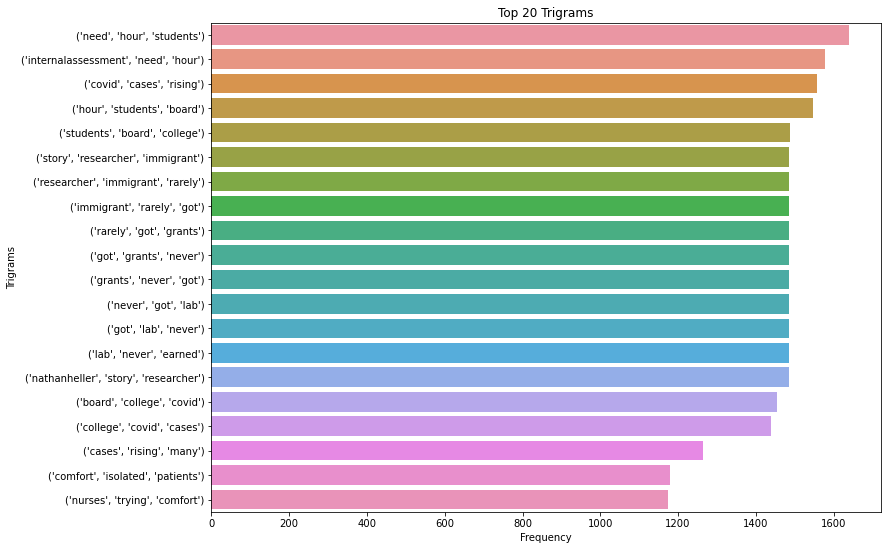

In [34]:
trigrams = tweets.apply(lambda x: ngrams(x,3))
tri_grams = trigrams.apply(lambda x: list(x))
top_20_trigrams = Counter(itertools.chain.from_iterable(tri_grams)).most_common(20)
top_trigram = pd.DataFrame(top_20_trigrams, columns=['bigram', 'frequency'])
top_trigram.set_index('bigram', inplace=True)
_ = plt.figure(figsize=(12,9))
_ = sns.barplot(x=top_trigram.frequency, y=top_trigram.index, orient='h')
_ = plt.xlabel('Frequency')
_ = plt.ylabel('Trigrams')
_ = plt.title('Top 20 Trigrams')
plt.show()

In [35]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

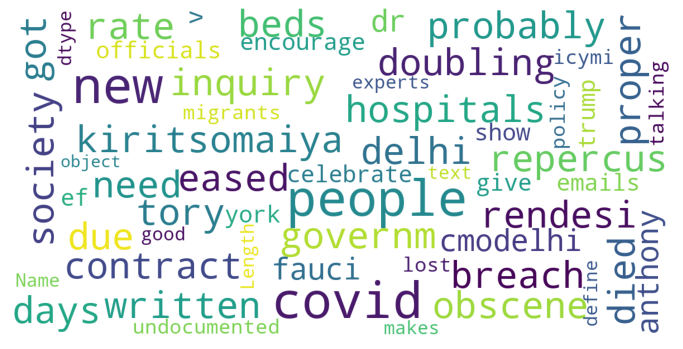

In [36]:
show_wordcloud(tweets)

In [39]:
# Read the data into pandas dataframe
start=time.time()

path = 'tidy_tweets.json'
tidy_tweets = pd.read_json(path, orient='table')

end=time.time()
total=end-start
total

0.9021387100219727

In [40]:
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [42]:
# Lemmatize tokens
start = time.time()

lemmatizer = WordNetLemmatizer()
tidy_tweets['lemmatized'] = tidy_tweets['text'].apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in x])

end = time.time()
total = end-start
total

2149.6480569839478

In [43]:
tidy_tweets['tokens_back_to_text'] = [' '.join(map(str, l)) for l in tidy_tweets['lemmatized']]

In [44]:
tidy_tweets['tokens_back_to_text'][3]

'get news people society die due covid prayer everyone pls take care go'

In [45]:
tidy_tweets.head()

,text,lemmatized,tokens_back_to_text
0,"[kiritsomaiya, beds, covid, hospitals, rendesi...","[kiritsomaiya, bed, covid, hospital, rendesivi...",kiritsomaiya bed covid hospital rendesivir tos...
2,"[breach, contract, probably, written, repercus...","[breach, contract, probably, write, repercussi...",breach contract probably write repercussion ad...
3,"[got, news, people, society, died, due, covid,...","[get, news, people, society, die, due, covid, ...",get news people society die due covid prayer e...
4,"[need, proper, inquiry, obscene, tory, governm...","[need, proper, inquiry, obscene, tory, governm...",need proper inquiry obscene tory government ha...
5,"[doubling, rate, delhi, eased, days, cmodelhi,...","[double, rate, delhi, ease, day, cmodelhi, rul...",double rate delhi ease day cmodelhi rule possi...


In [46]:
# Explort the lemmatized data to json file for ease of use in the next steps
path = 'lemmatized.json'
tidy_tweets.to_json(path, orient='table')